<a href="https://colab.research.google.com/github/HuifeixinChen/-Pediatric-Tumors/blob/main/BraTS_PEDs_Focus_on_Pediatrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/MyDrive/BraTS-PEDs2024_Training_small_set"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

data_dir = "/content/drive/MyDrive/BraTS-PEDs2024_Training_small_set"

# 查看路径下文件夹（应该有患者文件夹列表）
print(os.listdir(data_dir))

['BraTS-PED-00158-000', 'BraTS-PED-00157-000', 'BraTS-PED-00159-000', 'BraTS-PED-00152-000', 'BraTS-PED-00160-000', 'BraTS-PED-00154-000', 'BraTS-PED-00151-000', 'BraTS-PED-00155-000', 'BraTS-PED-00153-000', 'BraTS-PED-00156-000', 'BraTS-PED-00145-000', 'BraTS-PED-00148-000', 'BraTS-PED-00149-000', 'BraTS-PED-00147-000', 'BraTS-PED-00144-000', 'BraTS-PED-00142-000', 'BraTS-PED-00150-000', 'BraTS-PED-00146-000', 'BraTS-PED-00143-000', 'BraTS-PED-00141-000', 'BraTS-PED-00139-000', 'BraTS-PED-00140-000', 'BraTS-PED-00131-000', 'BraTS-PED-00132-000', 'BraTS-PED-00121-000', 'BraTS-PED-00138-000', 'BraTS-PED-00130-000', 'BraTS-PED-00135-000', 'BraTS-PED-00123-000', 'BraTS-PED-00137-000', 'BraTS-PED-00124-000', 'BraTS-PED-00136-000', 'BraTS-PED-00134-000', 'BraTS-PED-00125-000', 'BraTS-PED-00133-000', 'BraTS-PED-00126-000', 'BraTS-PED-00128-000', 'BraTS-PED-00129-000', 'BraTS-PED-00127-000', 'BraTS-PED-00122-000', 'BraTS-PED-00114-000', 'BraTS-PED-00116-000', 'BraTS-PED-00117-000', 'BraTS-PED

In [ ]:
import nibabel as nib

patient_id = "BraTS-PED-00029-000"
modality = "t1c"

img_path = os.path.join(data_dir, patient_id, f"{patient_id}-{modality}.nii.gz")

if os.path.exists(img_path):
    img = nib.load(img_path).get_fdata()
    print(f"图像数据维度：{img.shape}")
else:
    print(f"未找到文件，请检查路径：{img_path}")


图像数据维度：(240, 240, 155)


In [ ]:
!pip install nibabel SimpleITK tqdm scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 43.5 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 克隆
!git clone https://github.com/MIC-DKFZ/nnUNet.git
%cd nnUNet
!git checkout v2.2.1
!pip install -e .
!pip install batchgenerators matplotlib nibabel


fatal: destination path 'nnUNet' already exists and is not an empty directory.
/content/nnUNet
Note: switching to 'v2.2.1'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 8451291 restrict dynamic-network-architectures to ==0.2
Obtaining file:///content/nnUNet
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Usin

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


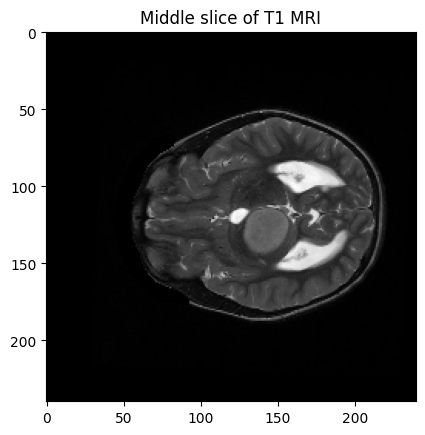

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/BraTS-PEDs2024_Training_small_set/BraTS-PED-00002-000/BraTS-PED-00002-000-t2w.nii.gz'
img = nib.load(img_path)
data = img.get_fdata()

slice_index = data.shape[2] // 2  # 取中间切片
plt.imshow(data[:, :, slice_index], cmap='gray')
plt.title('Middle slice of T1 MRI')
plt.show()


In [ ]:
import os

os.environ['nnUNet_raw'] = '/content/nnUNet_raw'
os.environ['nnUNet_preprocessed'] = '/content/nnUNet_preprocessed'
os.environ['nnUNet_results'] = '/content/nnUNet_results'


In [ ]:
%cd /content/nnUNet


/content/nnUNet


In [ ]:
!pip show nnunetv2



Name: nnunetv2
Version: 2.6.0
Summary: nnU-Net is a framework for out-of-the box image segmentation.
Home-page: https://github.com/MIC-DKFZ/nnUNet
Author: Helmholtz Imaging Applied Computer Vision Lab
Author-email: Fabian Isensee <f.isensee@dkfz-heidelberg.de>
License: Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i)

In [ ]:
import importlib.metadata

version_str = importlib.metadata.version("nnunetv2")
print("nnunetv2 version:", version_str)


nnunetv2 version: 2.6.0


In [2]:
import os

os.environ['nnUNet_raw'] = "/content/nnUNet_raw"
os.environ['nnUNet_preprocessed'] = "/content/nnUNet_preprocessed"
os.environ['nnUNet_results'] = "/content/nnUNet_results"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p /content/nnUNet_raw/Task999_BraTSPED/imagesTr
!mkdir -p /content/nnUNet_raw/Task999_BraTSPED/labelsTr


In [ ]:
data_dir = "/content/drive/MyDrive/BraTS-PEDs2024_Training_small_set"


In [ ]:
import os
import shutil

# 1) 原始数据根目录：里面有多个子文件夹，如 BraTS-PED-00001-000, BraTS-PED-00002-000, ...
source_root = "/content/drive/MyDrive/BraTS-PEDs2024_Training_small_set"

# 2) nnU-Net 目标目录 (Task999_BraTSPED 仅作示例)
task_dir = "/content/nnUNet_raw/Task999_BraTSPED"
imagesTr = os.path.join(task_dir, "imagesTr")
labelsTr = os.path.join(task_dir, "labelsTr")

os.makedirs(imagesTr, exist_ok=True)
os.makedirs(labelsTr, exist_ok=True)

modal_map = {
    "-t1c.nii.gz": "_0000.nii.gz",
    "-t1n.nii.gz": "_0001.nii.gz",
    "-t2f.nii.gz": "_0002.nii.gz",
    "-t2w.nii.gz": "_0003.nii.gz",
}

for case_folder in os.listdir(source_root):
    case_path = os.path.join(source_root, case_folder)
    if not os.path.isdir(case_path): continue
    for file in os.listdir(case_path):
        fpath = os.path.join(case_path, file)
        if file.endswith("-seg.nii.gz"):
            target = os.path.join(labelsTr, case_folder + ".nii.gz")
            shutil.copyfile(fpath, target)
        else:
            for suffix, nnUNet_suffix in modal_map.items():
                if file.endswith(suffix):
                    target = os.path.join(imagesTr, case_folder + nnUNet_suffix)
                    shutil.copyfile(fpath, target)


In [3]:
!pip install -q git+https://github.com/MIC-DKFZ/nnUNet.git@v2.2.1


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from nnunetv2.dataset_conversion.generate_dataset_json import generate_dataset_json

# 定义路径（请确认你已经准备好 imagesTr 和 labelsTr）
output_folder = "/content/nnUNet_raw/Task999_BraTSPED"

generate_dataset_json(
    output_folder=output_folder,
    channel_names={
        0: "T1CE",
        1: "T1N",
        2: "T2F",
        3: "T2W"
    },
    labels={
        "background": 0,
        "ET": 1,
        "NET": 2,
        "CC": 3,
        "ED": 4
    },
    num_training_cases=len(os.listdir(f"{output_folder}/imagesTr")),  # 自动统计 case 数
    file_ending=".nii.gz",
    dataset_name="BraTSPED",
    description="Pediatric brain tumor segmentation with 4 MRI modalities.",
    license="CC-BY-SA 4.0",
    converted_by="Your Name"
)


In [ ]:
!ls /content/nnUNet_raw


Task999_BraTSPED


In [ ]:
import json

json_path = "/content/nnUNet_raw/Dataset999_BraTSPED/dataset.json"

with open(json_path, 'r') as f:
    data = json.load(f)

data["numTraining"] = 155  # 改为实际数量

with open(json_path, 'w') as f:
    json.dump(data, f, indent=4)

print("已更新 numTraining = 155")


已更新 numTraining = 155


In [ ]:
!mv /content/nnUNet_raw/Task999_BraTSPED /content/nnUNet_raw/Dataset999_BraTSPED



In [ ]:
!nnUNetv2_plan_and_preprocess -d 999 --verify_dataset_integrity


Fingerprint extraction...
Dataset999_BraTSPED
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
100% 155/155 [00:51<00:00,  3.03it/s]
Experiment planning...
2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 49, 'patch_size': array([256, 256]), 'median_image_size_in_voxels': array([240., 227.]), 'spacing': array([1., 1.]), 'normalization_schemes': ['ZScoreNormalization', 'ZScoreNormalization', 'ZScoreNormalization', 'ZScoreNormalization'], 'use_mask_for_norm': [False, False, False, False], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': (2, 2, 2, 2, 2, 2, 2), 'n_conv_per_stage_decoder': (2, 2, 2, 2, 2, 2),

In [ ]:
!pip install hiddenlayer


In [ ]:
for i in range(5):  # 遍历 0 到 4 的所有折
    !nnUNetv2_train Dataset999_BraTSPED 3d_fullres {i}


Using device: cuda:0
/usr/local/lib/python3.11/dist-packages/nnunetv2/training/nnUNetTrainer/nnUNetTrainer.py:158: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.grad_scaler = GradScaler() if self.device.type == 'cuda' else None

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

This is the configuration used by this training:
Configuration name: 3d_fullres
 {'data